# Markowitz Theory

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

## Artificially generating Markowitz bullet

In this section we will be randomly generating 5 stocks and the covariance matrix between them artificially to generate the Markowitz marker. This will be done carefully as we need to generate uniform probabilities and for this we will use the simplex method

In [7]:
acoes = []
for i in range(3):
  A1 = np.random.normal(10,0.8,100)
  A2 = np.random.normal(2.7,0.8,100)
  A3 = np.random.normal(8,0.8,100)
  A4 = np.random.normal(7,0.8,100)
  A5 = np.random.normal(9,0.8,100)
  acao = [A1,A2,A3,A4,A5]
  acoes.append(acao)
nomes = ["A1","A2","A3","A4","A5"]

In [8]:
class Markowitz():

  def __init__(self,acoes,nomes): # recebe uma lista com ações para criar o objeto em função dessas ações
    self.nomes = nomes # nomes das ações
    self.retorno = [np.mean([(acoes[j][i+1]-acoes[j][i])/acoes[j][i] for i in range(0,len(acoes[j])-1)]) for j in range(len(acoes))] #fazendo o retorno médio de cada acao
    self.risco  =  np.cov(acoes)

  def gerando_prob(self, n):   # Método de sorteio em um simplexo. Possui distribuição uniforme.
    """Gera um array no Rn, de forma uniforme, onde suas entradas somam 1
    int -> array"""
    aleatorio = [0]
    for _ in range(1, n):
        aleatorioi = np.random.rand()  # Gero números entre [0, 1) uniformemente
        aleatorio.append(aleatorioi)    # Os adiciono a lista.
    aleatorio.sort()                    # Ordeno-a
    aleatorio.append(1)

    pesos = np.array(aleatorio[1:]) - np.array(aleatorio[:-1])
    
    return pesos

  def mark(self,n,m, mod=False): # função que recebe n número de carteiras geradas e m número de ações e retorna o retorno médio e o risco de cada carteira
    retorno_medio = []
    riscor = []

    if mod:
      composicaoC = []
      retorno_medio = []
      riscor = []

      for i in range(n):
        probs = self.gerando_prob(m)
        retorno_medio.append(np.sum([self.retorno[i]*probs[i] for i in range(m)]))
        riscor.append(np.array(probs)@self.risco@np.array(probs))
        composicaoC.append(probs)
      return retorno_medio, riscor, composicaoC

    for i in range(n):
      probs = self.gerando_prob(m)
      retorno_medio.append(np.sum([self.retorno[i]*probs[i] for i in range(m)]))
      riscor.append(np.dot(np.array(probs),np.dot(self.risco,np.array(probs))))
    return retorno_medio,riscor

  def balaMarkowitz(self,n, mod=False):
    retorno_medio,riscor=self.mark(n,len(self.retorno))

    if mod:
      retorno_medio,riscor, compC =self.mark(n,len(self.retorno), mod)
      ativ_eixo_x = np.sqrt(np.diagonal(self.risco))
      ativ_eixo_y = self.retorno
      cart_eixo_x = np.sqrt(riscor)
      cart_eixo_y = retorno_medio
      return ativ_eixo_x, ativ_eixo_y, cart_eixo_x, cart_eixo_y, compC

    plt.plot(np.sqrt(np.diagonal(self.risco)),self.retorno,'o',color="red")
    plt.plot(np.sqrt(riscor),retorno_medio,"o",color="blue")
    plt.tight_layout()
    plt.suptitle('Bala de Markowitz', fontsize=15)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.xlabel("Risco")
    plt.ylabel("Retorno")

    plt.show

  def __str__(self):
    return f"O DataFrame tem riscos^2\\covariancia \n {pd.DataFrame(self.risco,self.nomes,columns = self.nomes)} \n e retornos médios {self.retorno}"

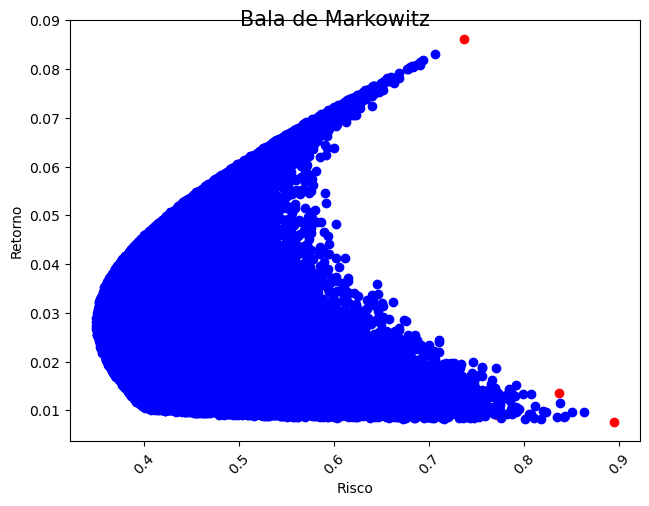

In [9]:
markow1 = Markowitz(acoes[0],nomes)
markow1.balaMarkowitz(100000)

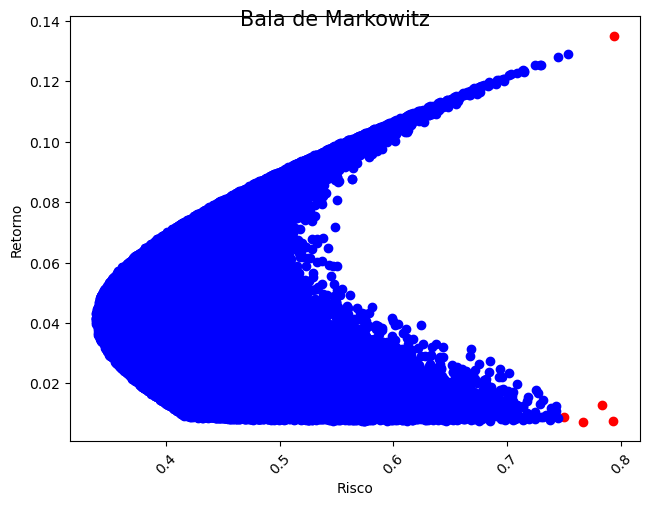

In [10]:
markow2 = Markowitz(acoes[1],nomes)
markow2.balaMarkowitz(100000)

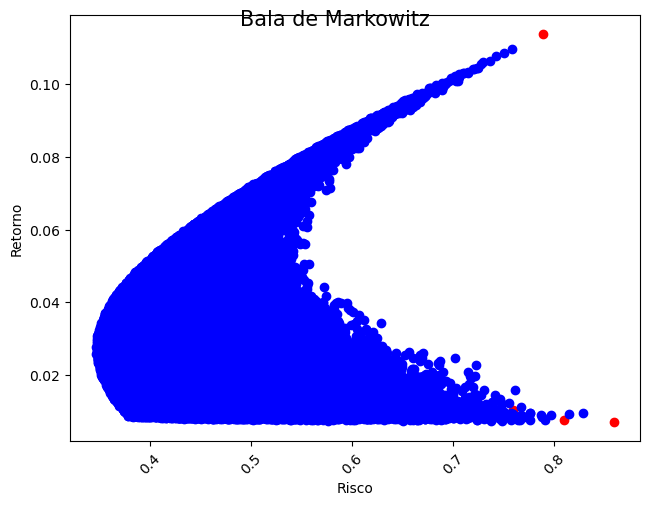

In [11]:
markow3 = Markowitz(acoes[2],nomes)
markow3.balaMarkowitz(100000)

## Markowitz Bullet with Brazilian shares

In this part of the code we will test the markowtiz theory in the Brazilian stock market. To do this, we chose 10 companies and will do:

- For each maximum risk R,
determine the composition of the optimal portfolio $X_{π}$.

- Generate a graph with R value in
$x$ axis and the $π$ value of 5 assets with the largest share in the portfolio on the $y$ axis

- Check the effect of
asset concentration in the Markowitz model

- Generate a graph with bullet points
and with points on the optimal frontier

In [14]:
!pip install yfinance

In [15]:
import yfinance as yf

B1 = yf.download('PETR4.SA', start='2023-01-01', end='2023-03-03')
B2 = yf.download('BBDC4.SA', start='2023-01-01', end='2023-03-03')
B3 = yf.download('ABEV3.SA', start='2023-01-01', end='2023-03-03')
B4 = yf.download('BBAS3.SA', start='2023-01-01', end='2023-03-03')
B5 = yf.download('B3SA3.SA', start='2023-01-01', end='2023-03-03')
B6 = yf.download('SUZB3.SA', start='2023-01-01', end='2023-03-03')
B7 = yf.download('MGLU3.SA', start='2023-01-01', end='2023-03-03')
B8 = yf.download('BRAP4.SA', start='2023-01-01', end='2023-03-03')
B9 = yf.download('ITUB4.SA', start='2023-01-01', end='2023-03-03')
B10 = yf.download('VALE3.SA', start='2023-01-01', end='2023-03-03')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
dados = pd.DataFrame({"Petrobras":B1['Open']['PETR4.SA'].tolist(),"BancoBradesco":B2['Open']['BBDC4.SA'].tolist(),
                      "Ambev":B3['Open']['ABEV3.SA'].tolist(),"BancodoBrasil":B4['Open']['BBAS3.SA'].tolist(),"B3":B5['Open']['B3SA3.SA'].tolist(),
                     "Suzano":B6['Open']['SUZB3.SA'].tolist(),"MagazineLuiza":B7['Open']['MGLU3.SA'].tolist(),
                      "Bradespar":B8['Open']['BRAP4.SA'].tolist(),"Itaú":B9['Open']['ITUB4.SA'].tolist(),"Vale":B10['Open']['VALE3.SA'].tolist()})
dados.head()

,Petrobras,BancoBradesco,Ambev,BancodoBrasil,B3,Suzano,MagazineLuiza,Bradespar,Itaú,Vale
0,14.848022,12.610028,13.422573,14.760383,11.879670,45.648777,24.786068,23.653110,21.742631,76.339028
1,14.469570,12.507637,13.198864,14.346297,11.322375,45.989435,24.318405,23.829506,21.796027,76.958828
2,13.851426,11.990721,13.310718,14.160826,11.238782,47.314236,24.224874,23.797434,21.413334,76.872749
3,14.721873,11.956825,13.301398,14.359243,11.173763,47.276384,24.131342,23.925722,21.448933,77.010484
4,15.100324,12.422893,13.329361,14.945860,11.378105,47.844157,24.973133,24.543110,22.187630,78.336174


In [17]:
acoes10 = [ B1['Open']['PETR4.SA'].tolist(), B2['Open']['BBDC4.SA'].tolist(),
           B3['Open']['ABEV3.SA'].tolist(), B4['Open']['BBAS3.SA'].tolist(),
           B5['Open']['B3SA3.SA'].tolist(), B6['Open']['SUZB3.SA'].tolist(),
           B7['Open']['MGLU3.SA'].tolist(), B8['Open']['BRAP4.SA'].tolist(),
           B9['Open']['ITUB4.SA'].tolist(), B10['Open']['VALE3.SA'].tolist()]

nomesAcoes = ["Petrobras", "BancoBradesco", "Ambev","BancodoBrasil","B3","Suzano","MagazineLuiza", "Bradespar","Itaú","Vale"]

In [18]:
dados.describe()

,Petrobras,BancoBradesco,Ambev,BancodoBrasil,B3,Suzano,MagazineLuiza,Bradespar,Itaú,Vale
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,16.004411,12.310073,12.632488,16.731729,11.315307,45.141837,34.437714,24.309824,22.764742,78.105588
std,0.789792,0.549790,0.434437,1.260988,0.822328,1.777759,5.744448,1.176575,0.637491,2.930262
min,13.851426,11.211168,11.987103,14.160826,9.692801,42.308387,24.131342,22.073565,21.413334,72.792385
25%,15.401514,12.010873,12.257419,15.395530,10.769724,43.671044,30.631839,23.374485,22.352280,75.912919
50%,16.286150,12.288148,12.592984,17.128431,11.405970,44.546356,35.963182,24.186309,22.708282,77.199867
75%,16.527412,12.613753,12.851648,17.658172,11.981840,46.959380,38.956217,25.433107,23.302351,80.722850
max,17.326897,13.496546,13.525107,18.461266,12.539137,48.856679,42.931339,26.347159,24.011055,84.232894


In [19]:
covariancia_dados = dados.cov()

In [20]:
correlacao_dados = dados.corr()

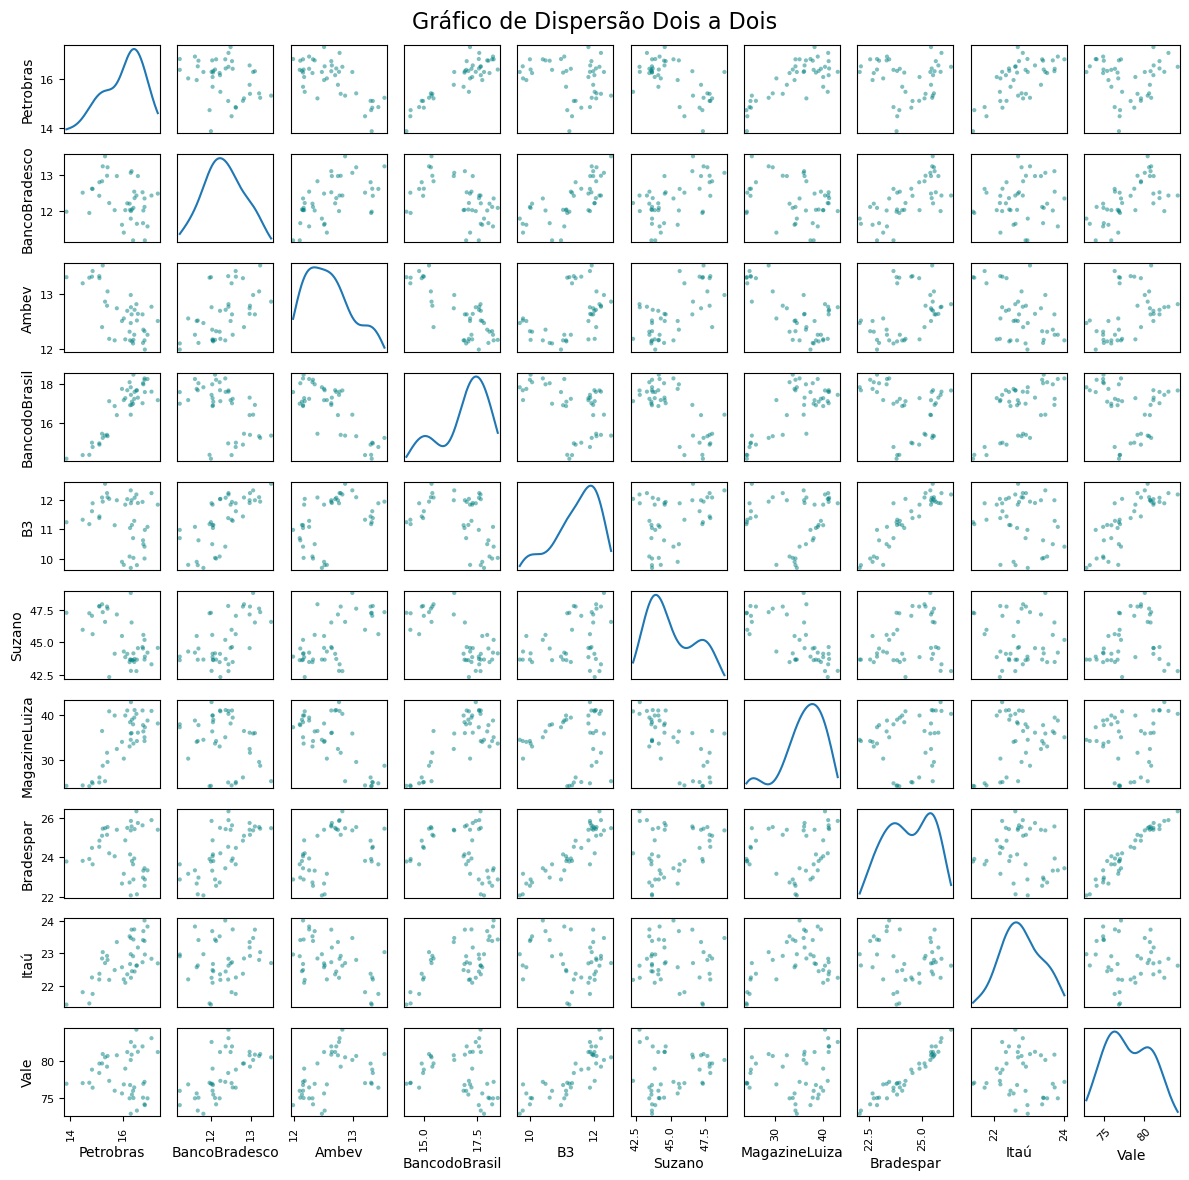

In [21]:
pd.plotting.scatter_matrix(dados,figsize=(12, 12), diagonal='kde', color='teal')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Gráfico de Dispersão Dois a Dois', fontsize=16)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)

plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

# Crie um objeto StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados e normalize-os
dados_normalizados = scaler.fit_transform(dados)
dadosNormais = pd.DataFrame(dados_normalizados)

In [23]:
correlacao_dados

,Petrobras,BancoBradesco,Ambev,BancodoBrasil,B3,Suzano,MagazineLuiza,Bradespar,Itaú,Vale
Petrobras,1.000000,-0.306485,-0.690958,0.893116,-0.229310,-0.612541,0.768792,-0.076183,0.653908,-0.018810
BancoBradesco,-0.306485,1.000000,0.529145,-0.468887,0.698730,0.577871,-0.290672,0.686106,0.108709,0.634401
Ambev,-0.690958,0.529145,1.000000,-0.791818,0.417095,0.653998,-0.712348,0.396775,-0.499322,0.426192
BancodoBrasil,0.893116,-0.468887,-0.791818,1.000000,-0.436668,-0.742830,0.767701,-0.291738,0.602802,-0.211576
B3,-0.229310,0.698730,0.417095,-0.436668,1.000000,0.320976,0.063329,0.908079,-0.194029,0.817155
Suzano,-0.612541,0.577871,0.653998,-0.742830,0.320976,1.000000,-0.687239,0.257906,-0.089502,0.214726
MagazineLuiza,0.768792,-0.290672,-0.712348,0.767701,0.063329,-0.687239,1.000000,0.157452,0.373664,0.153237
Bradespar,-0.076183,0.686106,0.396775,-0.291738,0.908079,0.257906,0.157452,1.000000,-0.113860,0.966086
Itaú,0.653908,0.108709,-0.499322,0.602802,-0.194029,-0.089502,0.373664,-0.113860,1.000000,-0.108260
Vale,-0.018810,0.634401,0.426192,-0.211576,0.817155,0.214726,0.153237,0.966086,-0.108260,1.000000


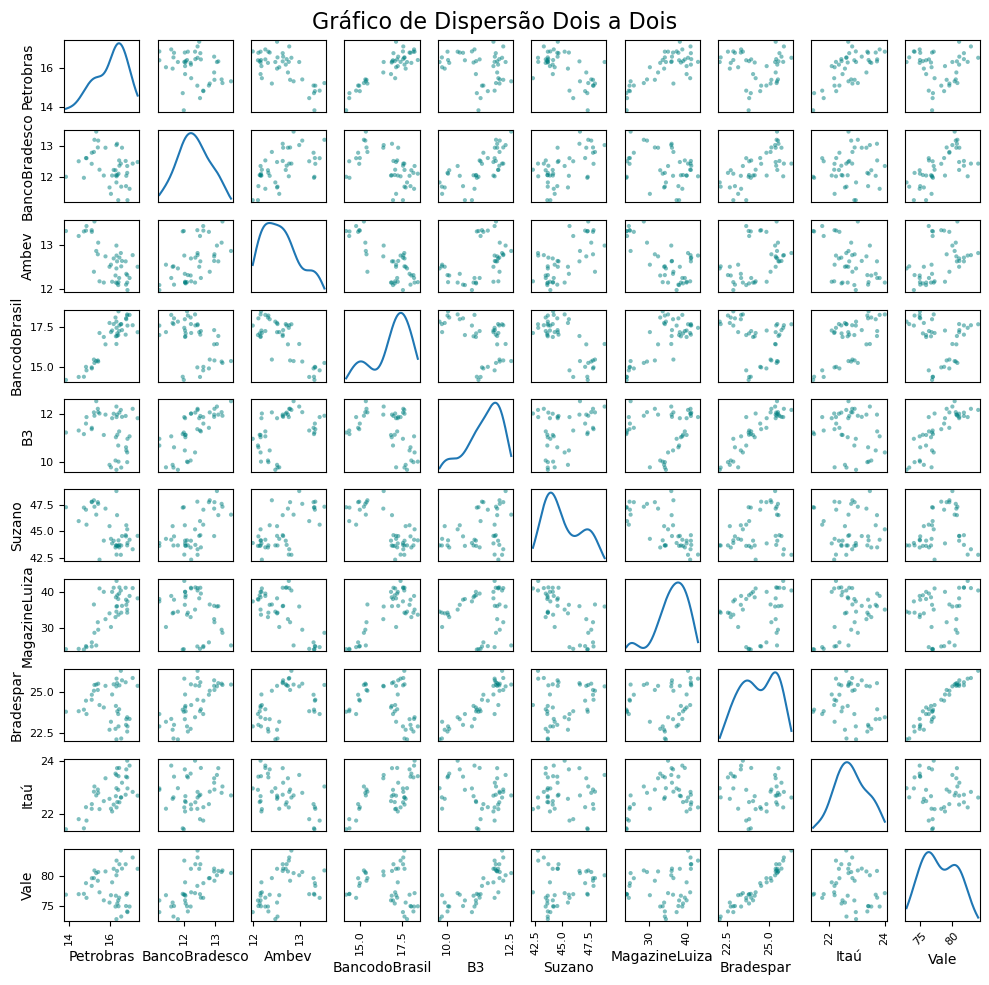

In [24]:
pd.plotting.scatter_matrix(dados,figsize=(10, 10), diagonal='kde', color='teal')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Gráfico de Dispersão Dois a Dois', fontsize=16)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)

plt.show()

In [25]:
Markow_br = Markowitz(acoes10,nomesAcoes)

In [26]:
print(Markow_br)

O DataFrame tem riscos^2\covariancia 
                Petrobras  BancoBradesco     Ambev  BancodoBrasil        B3  \
Petrobras       0.623771      -0.133082 -0.237078       0.889470 -0.148930   
BancoBradesco  -0.133082       0.302269  0.126386      -0.325070  0.315901   
Ambev          -0.237078       0.126386  0.188735      -0.433773  0.149007   
BancodoBrasil   0.889470      -0.325070 -0.433773       1.590092 -0.452801   
B3             -0.148930       0.315901  0.149007      -0.452801  0.676223   
Suzano         -0.860043       0.564808  0.505098      -1.665227  0.469235   
MagazineLuiza   3.487945      -0.918012 -1.777737       5.560978  0.299157   
Bradespar      -0.070793       0.443820  0.202811      -0.432836  0.878594   
Itaú            0.329233       0.038101 -0.138287       0.484574 -0.101715   
Vale           -0.043533       1.022039  0.542548      -0.781780  1.969045   

                 Suzano  MagazineLuiza  Bradespar      Itaú      Vale  
Petrobras     -0.860043       

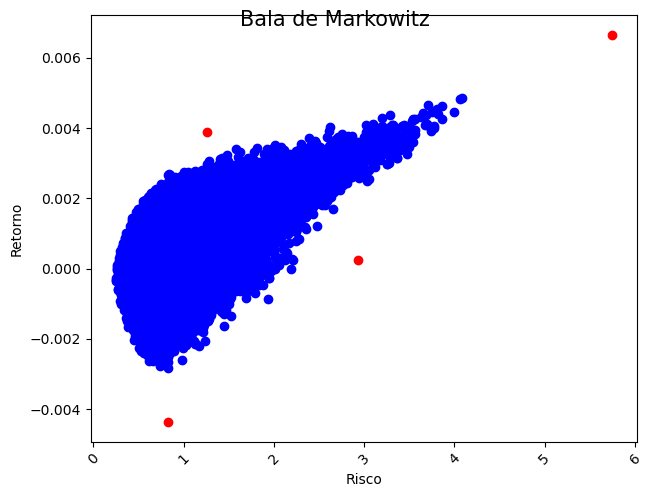

In [27]:
Markow_br.balaMarkowitz(100000)

In [28]:
ativ_eixo_x, ativ_eixo_y, cart_eixo_x, cart_eixo_y, compC = Markow_br.balaMarkowitz(10000, mod = True)

In [29]:
### Truncando os riscos
cart_eixo_x_trun, cart_ot_eixo_x, cart_ot_eixo_y , compC_ot = [], [], [], []

for i in cart_eixo_x:
  cart_eixo_x_trun.append(round(i, 2))

for risc in set(cart_eixo_x_trun): # Analisando para todos os riscos distintos da Bala de markowitz
  idx_eq = [i for i, item in enumerate(cart_eixo_x_trun) if item == risc] # Indices dos riscos que são iguais

  values = [cart_eixo_y[i] for i in idx_eq ]
  max_value = max(values)
  idx_max_value = values.index(max_value)

  compC_ot.append(compC[idx_eq[idx_max_value]])
  cart_ot_eixo_x.append(cart_eixo_x_trun[idx_eq[idx_max_value]])
  cart_ot_eixo_y.append(max_value)

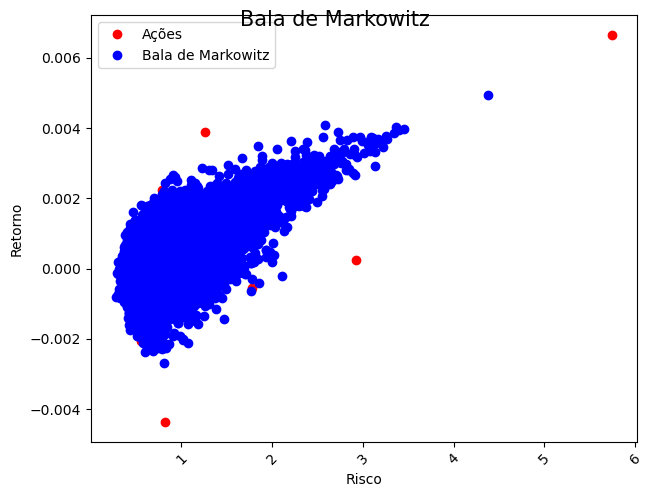

In [30]:
plt.plot(ativ_eixo_x,ativ_eixo_y,'o',color="red", label = 'Ações')
plt.plot(cart_eixo_x,cart_eixo_y,"o",color="blue", label = 'Bala de Markowitz')
plt.tight_layout()
plt.suptitle('Bala de Markowitz', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Risco")
plt.ylabel("Retorno")
plt.legend()
plt.show()

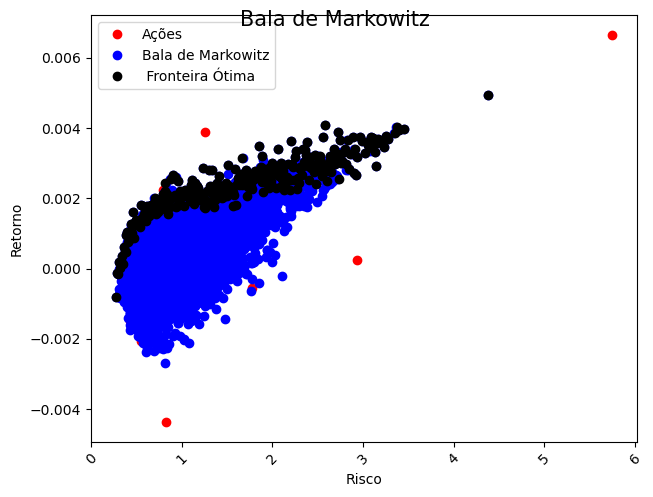

In [31]:
plt.plot(ativ_eixo_x,ativ_eixo_y,'o',color="red", label = 'Ações')
plt.plot(cart_eixo_x,cart_eixo_y,"o",color="blue", label = 'Bala de Markowitz')
plt.plot(cart_ot_eixo_x, cart_ot_eixo_y, 'o', color='black', label = ' Fronteira Ótima')
plt.tight_layout()
plt.suptitle('Bala de Markowitz', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Risco")
plt.ylabel("Retorno")
plt.legend()
plt.show()

In [33]:
def conc_prob(compC_ot, n):
    # Retorna o vetor de prob com as n maiores probabilidades (distribuição)
    dist_prob = []

    for comp in compC_ot:
        indices = np.argsort(comp)[-n:]  # Obtém os índices dos n maiores valores
        aux = comp[indices]             # Obtém os n maiores valores diretamente
        dist_prob.append(aux)

    return dist_prob

conc_compC_ot = conc_prob(compC_ot, 5)
eixo_x, eixo_y = [], []

for idx, comp in enumerate(conc_compC_ot):
  if idx % 5 == 0:
    for probs in comp:
      eixo_x.append(cart_ot_eixo_x[idx])
      eixo_y.append(probs)

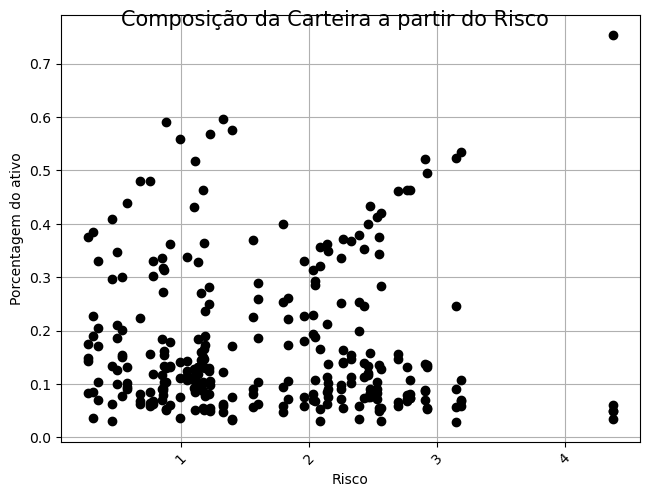

In [35]:
plt.plot(eixo_x, eixo_y, 'o', color='black')
plt.tight_layout()
plt.suptitle('Composição da Carteira a partir do Risco', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Risco")
plt.ylabel("Porcentagem do ativo")
plt.grid()
plt.show()